# Step 1: Data Cleaning and Exploratory Data Analysis (EDA)

## Overview Summary
- **Raw data**: 541,909 transactions from UK retail company (2010-2011)  
- **After cleaning**: 397,924 valid transactions from 4,372 UK customers
- **Purpose**: Prepare high-quality data for customer segmentation

## Implementation Process

1. **Load and understand data** - Explore structure and quality
2. **Clean data** - Remove invalid transactions  
3. **EDA analysis** - Understand patterns and trends
4. **Visualization** - Visualize key insights
5. **Export clean data** - Prepare for next step

## About the Dataset

**Source**: UK online retail company specializing in unique gifts  
**Period**: 12/2010 - 12/2011  
**Scope**: Global transactions with focus on UK market

### Main Data Fields:
| Field | Description | Example |
|---------|--------|--------|  
| `InvoiceNo` | Invoice number (6 digits) | 536365 |
| `StockCode` | Product code | 85123A |
| `Description` | Product name | WHITE HANGING HEART |
| `Quantity` | Purchase quantity | 6 |
| `InvoiceDate` | Transaction time | 2010-12-01 08:26:00 |
| `UnitPrice` | Unit price (GBP) | 2.55 |
| `CustomerID` | Customer ID | 17850 |
| `Country` | Country | United Kingdom |

## Basic Setup

In [14]:
%load_ext autoreload
%autoreload 2

# Import libraries
import sys
sys.path.append('../src')

from clustering_library import DataCleaner, DataVisualizer
import pandas as pd
import matplotlib.pyplot as plt

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [15]:
# Set style for charts
visualizer = DataVisualizer()

## Load Data

In [16]:
# Load Online Retail data
data_path = "../data/raw/online_retail.csv"

# Initialize data cleaner and load data
cleaner = DataCleaner(data_path)
df = cleaner.load_data()

# Display first rows
df.head()

Data shape: (541909, 8)
Number of records: 541,909


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,017850,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,017850,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,017850,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,017850,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,017850,United Kingdom


In [17]:
# Check basic information about the data
print("General information:")
print(f"- Size: {df.shape[0]:,} rows x {df.shape[1]} columns")
print(f"- Missing values: {df.isnull().sum().sum():,} values")
print(f"- Unique customers: {df['CustomerID'].nunique():,}")

df.info()

General information:
- Size: 541,909 rows x 8 columns
- Missing values: 136,534 values
- Unique customers: 4,372
<class 'pandas.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    541909 non-null  object        
 1   StockCode    541909 non-null  object        
 2   Description  540455 non-null  object        
 3   Quantity     541909 non-null  int64         
 4   InvoiceDate  541909 non-null  datetime64[us]
 5   UnitPrice    541909 non-null  float64       
 6   CustomerID   406829 non-null  str           
 7   Country      541909 non-null  object        
dtypes: datetime64[us](1), float64(1), int64(1), object(4), str(1)
memory usage: 35.5+ MB


## Data Cleaning

We will clean the data by:
1. Adding TotalPrice column (Quantity × UnitPrice)
2. Removing cancelled invoices (starting with 'C')
3. Focusing on UK customers only
4. Removing records with missing CustomerID
5. Removing records with invalid quantity or price

In [18]:
# Clean data
df_uk = cleaner.clean_data()

# Create time features for analysis
cleaner.create_time_features()

print("Data cleaning results:")
print(f"- Raw data: {df.shape[0]:,} transactions")
print(f"- Clean data: {df_uk.shape[0]:,} transactions")
print(f"- Removed: {df.shape[0] - df_uk.shape[0]:,} transactions ({((df.shape[0] - df_uk.shape[0])/df.shape[0]*100):.1f}%)")
print(f"- UK customers: {df_uk['CustomerID'].nunique():,}")

df_uk.head()

Data cleaning results:
- Raw data: 541,909 transactions
- Clean data: 354,321 transactions
- Removed: 187,588 transactions (34.6%)
- UK customers: 3,920


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TotalPrice,DayOfWeek,HourOfDay
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,017850,United Kingdom,15.30,2,8
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,017850,United Kingdom,20.34,2,8
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,017850,United Kingdom,22.00,2,8
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,017850,United Kingdom,20.34,2,8
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,017850,United Kingdom,20.34,2,8


## Basic Exploratory Analysis

After cleaning the data, we will explore patterns and insights in customer behavior.

### Revenue Over Time

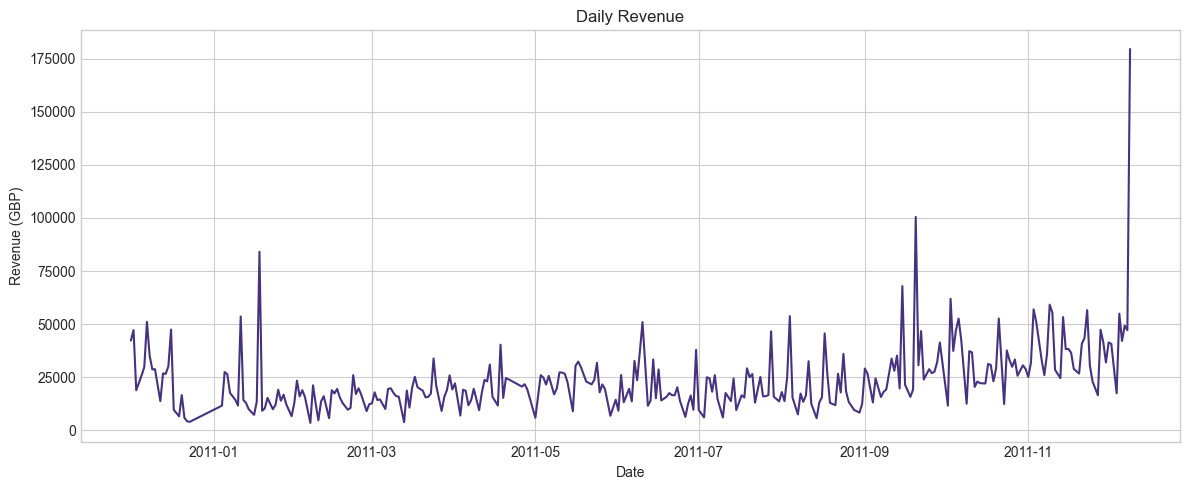

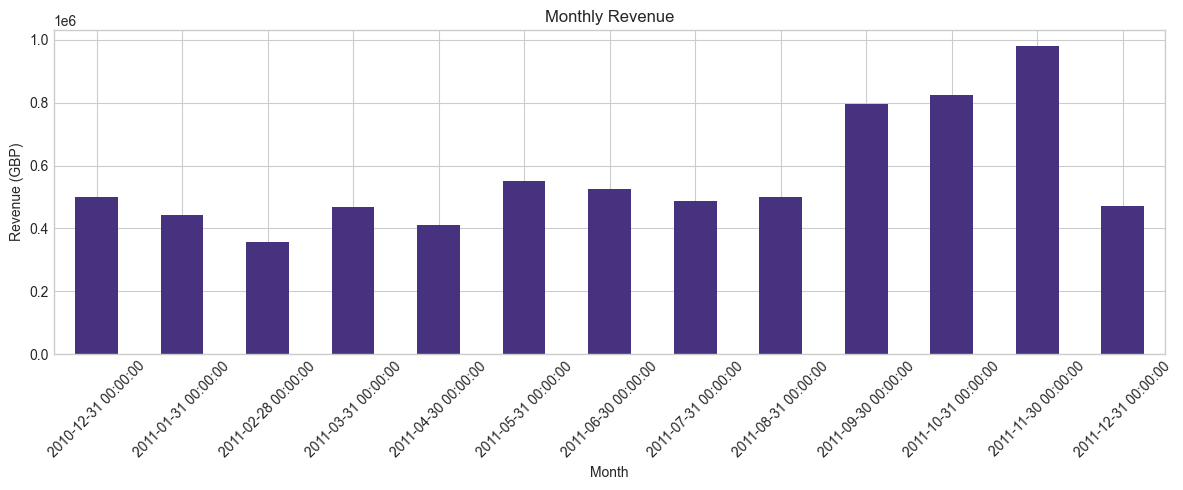

In [19]:
# Analyze revenue over time
visualizer.plot_revenue_over_time(df_uk)

### Purchase Time Patterns

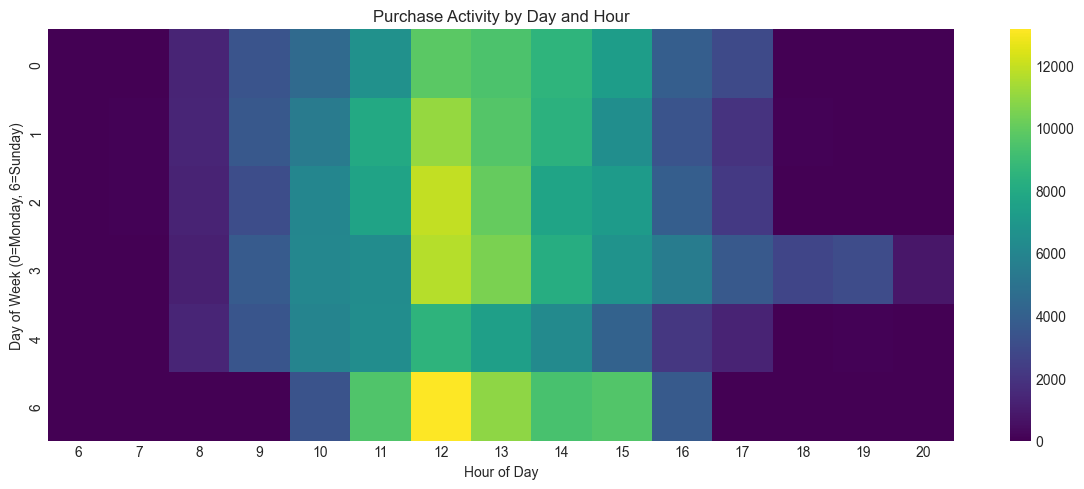

In [20]:
# Analyze purchase time patterns
visualizer.plot_time_patterns(df_uk)

## Product Analysis

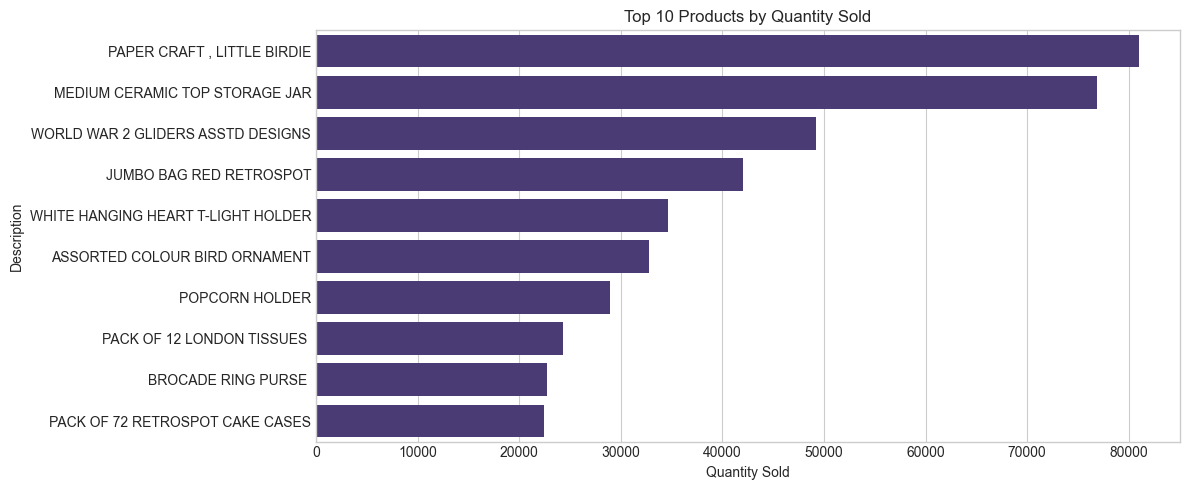

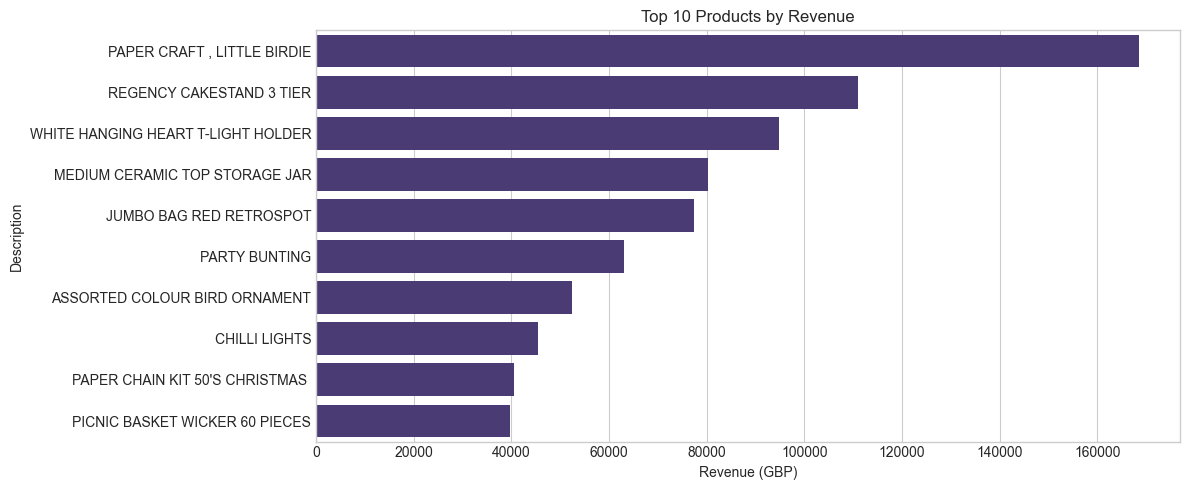

In [21]:
# Analyze top products
visualizer.plot_product_analysis(df_uk)

## Customer Analysis

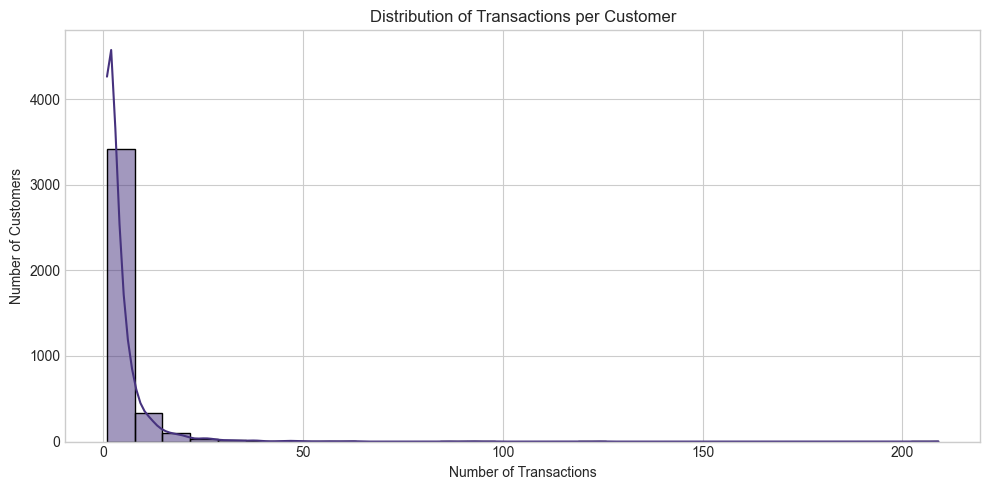

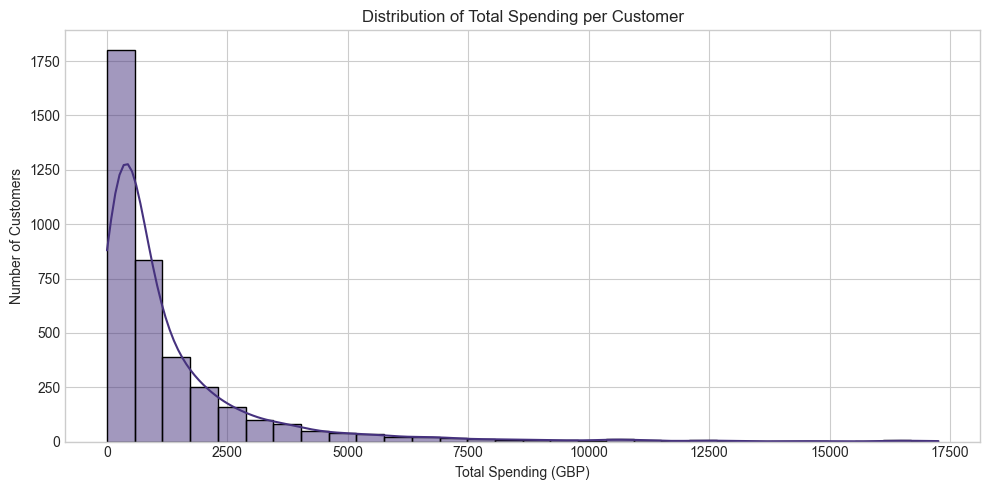

In [22]:
# Analyze customer behavior distribution
visualizer.plot_customer_distribution(df_uk)

In [23]:
# Analyze customer spending
spend_per_customer = df_uk.groupby("CustomerID")["TotalPrice"].sum()
transactions_per_customer = df_uk.groupby("CustomerID")["InvoiceNo"].nunique()

print("Customer behavior analysis:")
print(f"- Average spending: £{spend_per_customer.mean():.2f}")
print(f"- Median spending: £{spend_per_customer.median():.2f}")
print(f"- Average transactions: {transactions_per_customer.mean():.1f} times")

spend_per_customer.describe()

Customer behavior analysis:
- Average spending: £1864.39
- Median spending: £652.28
- Average transactions: 4.2 times


count      3920.000000
mean       1864.385601
std        7482.817477
min           3.750000
25%         300.280000
50%         652.280000
75%        1576.585000
max      259657.300000
Name: TotalPrice, dtype: float64

## Prepare RFM Analysis

RFM stands for:
- **R**ecency: How long ago did the customer last purchase?
- **F**requency: How often do they purchase?
- **M**onetary: How much do they spend?

In [24]:
# Calculate RFM metrics (Recency, Frequency, Monetary)
rfm_data = cleaner.calculate_rfm()

print("RFM Analysis:")
print(f"- Average Recency: {rfm_data['Recency'].mean():.0f} days")
print(f"- Average Frequency: {rfm_data['Frequency'].mean():.1f} transactions")
print(f"- Average Monetary: £{rfm_data['Monetary'].mean():.2f}")

rfm_data.head(10)

RFM Analysis:
- Average Recency: 92 days
- Average Frequency: 4.2 transactions
- Average Monetary: £1864.39


,Recency,Frequency,Monetary
CustomerID,,,
012346,326,1,77183.60
012747,2,11,4196.01
012748,1,209,33719.73
012749,4,5,4090.88
012820,3,4,942.34
012821,214,1,92.72
012822,71,2,948.88
012823,75,5,1759.50
012824,60,1,397.12


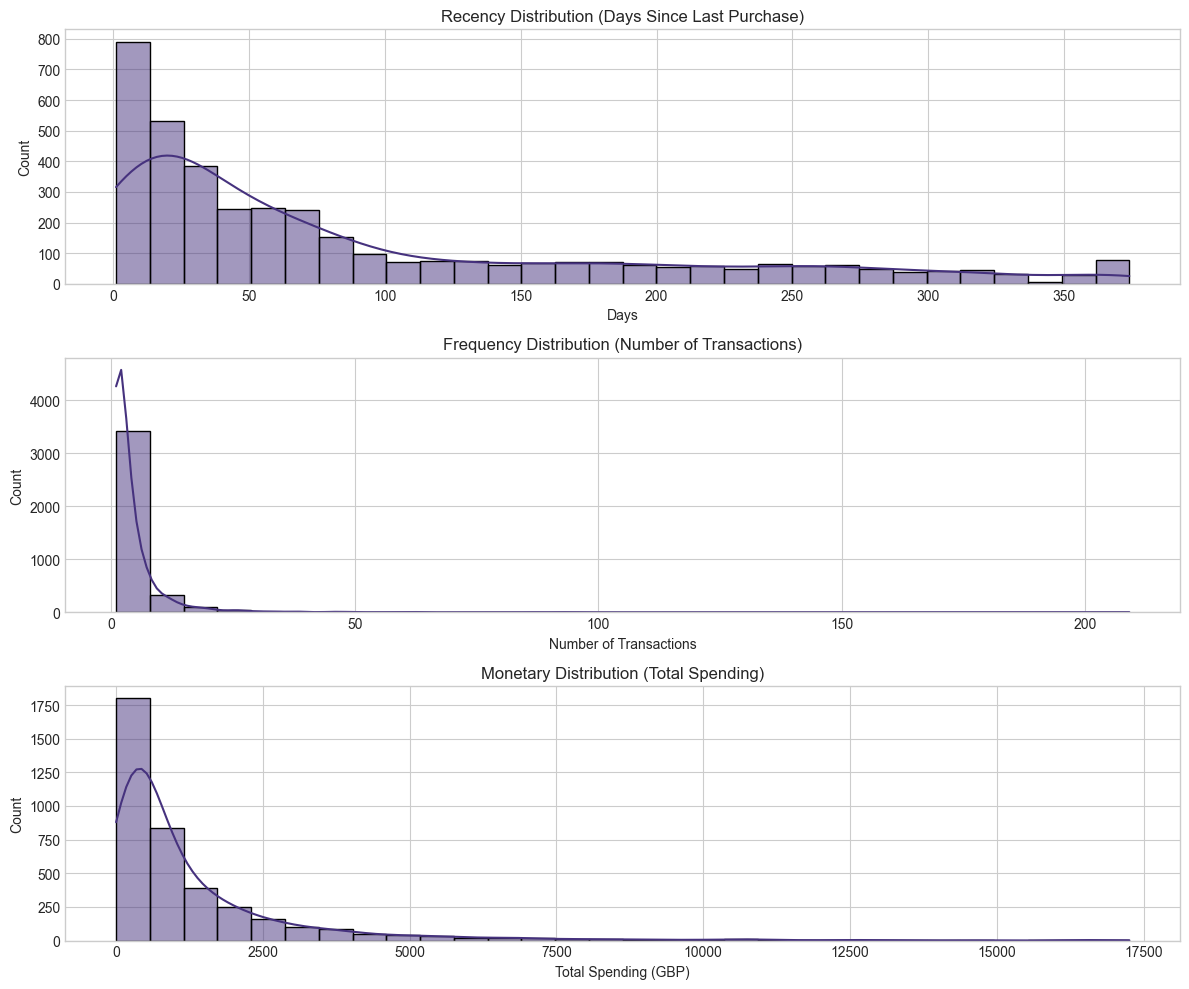

In [25]:
# Visualize RFM distribution
visualizer.plot_rfm_analysis(rfm_data)

## Save Cleaned Data

In [26]:
# Save cleaned data
cleaner.save_cleaned_data()

print("Data saved successfully:")
print("- File: cleaned_uk_data.csv")
print(f"- Size: {df_uk.shape[0]:,} rows")
print("- Ready for feature engineering step")

Saved cleaned data: ../data/processed/cleaned_uk_data.csv
Saved RFM data: ../data/processed/rfm_data.csv
Data saved successfully:
- File: cleaned_uk_data.csv
- Size: 354,321 rows
- Ready for feature engineering step


## Summary

In this notebook, we:

1. **Loaded data** from the Online Retail dataset
2. **Cleaned data** by:
   - Adding TotalPrice column
   - Removing cancelled invoices
   - Filtering UK customers only
   - Removing records with missing CustomerID
   - Removing invalid quantity/price records
3. **Explored data** through:
   - Revenue patterns over time
   - Purchase time patterns (day/hour)
   - Top products by quantity and revenue
   - Customer behavior analysis
   - RFM analysis (Recency, Frequency, Monetary)
4. **Saved cleaned data** for feature engineering

### Key Findings:
- Dataset covers December 2010 to December 2011
- After cleaning, we have **354,321** transactions from **3,920** unique UK customers
- Revenue shows an increasing trend over time
- Most purchases occur during business hours (weekdays)
- Customer spending and transaction frequency vary widely